# Business Problem Statement 

---

Your company now sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create.

Data source 

---

In the folder zippedData are movie datasets from:

          1.  Box Office 
          2.  IMDB
          3.  Rotten Tomatoes
          4.  TheMovieDB
          5.  The Numbers


# Business Understanding

This will be instrumental in the planning, growth and development of the movie studio startup business by not only charting the strategic direction in the beginning but also provide performance management tools for Monitoring and Evaluation as time goes.


---

## Business Objectives


              1.   Identify movie trends that Drive business success in the film industry 
              2.   Evaluate Movie perfomance to determine budget allocation and risk assesment
              3.   Provide data insights that help in   Movie creation strategies
              4.   Help in  Target identication
              5.   Help in market research and competitor analysis 


In [1]:
# import requisite libraries for analysis 
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Data Understanding

In [2]:
# connect to database 
connection = sqlite3.connect('im.db')
cursor=connection.cursor()

In [3]:
# display tables in the database
# determine tables most relevant for analysis
table_name_query = """SELECT name
                      AS 'Table Names'
                      FROM sqlite_master
                      WHERE type='table';"""

pd.read_sql(table_name_query, connection)

,Table Names
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [4]:
# convert tables to pandas dataframes for analysis
# Expand all the dataframes to undertand the most promising attributes
df=pd.read_sql('SELECT * FROM movie_basics',connection)
df1=pd.read_sql('SELECT * FROM movie_ratings',connection)
df2=pd.read_sql('SELECT * FROM directors',connection)
df3=pd.read_sql('SELECT * FROM movie_akas',connection)
df4=pd.read_sql('SELECT * FROM persons',connection)
df5=pd.read_sql('SELECT * FROM writers',connection)
df6=pd.read_sql('SELECT * FROM known_for',connection)
df7=pd.read_sql('SELECT * FROM principals',connection)

In [5]:
# display principal table attributes
df7.head()

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


In [6]:
# display known_for table attributes
df6.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [7]:
# display writers table attributes
df5.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [8]:
# display persons table attributes
df4.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [9]:
# display movie_akas table attributes
df3.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [42]:
# display directors table attributes
df2.head


<bound method NDFrame.head of          movie_id   person_id
0       tt0285252   nm0899854
1       tt0462036   nm1940585
2       tt0835418   nm0151540
3       tt0835418   nm0151540
4       tt0878654   nm0089502
...           ...         ...
291169  tt8999974  nm10122357
291170  tt9001390   nm6711477
291171  tt9001494  nm10123242
291172  tt9001494  nm10123248
291173  tt9004986   nm4993825

[291174 rows x 2 columns]>

In [11]:
# # display movie_basics table attributes
df=pd.read_sql('SELECT * FROM movie_basics',connection)
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [12]:
# # display movie_ratings table  attributes
df1=pd.read_sql_query("select * from movie_ratings",connection)
df1

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [13]:
# merge df and df1
# df1 and df2 make most sense as concerns the business success criteria
merged_df = pd.merge(df, df1, on='movie_id')
merged_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


In [14]:
# dispaly first leading rows in the dataset
merged_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [15]:
# dispaly last rows in the dataset
merged_df.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5
73855,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary,6.5,11


In [16]:
# display the data type, missing values, total count of enties and columns
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [17]:
merged_df.shape

(73856, 8)

In [18]:
# display basic desciptive statistics
merged_df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,66236.000000,73856.000000,7.385600e+04
mean,2014.276132,94.654040,6.332729,3.523662e+03
std,2.614807,208.574111,1.474978,3.029402e+04
min,2010.000000,3.000000,1.000000,5.000000e+00
25%,2012.000000,81.000000,5.500000,1.400000e+01
50%,2014.000000,91.000000,6.500000,4.900000e+01
75%,2016.000000,104.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [19]:
# calculate median to determine data skewness from mean
medians = merged_df.median()
medians

start_year         2014.0
runtime_minutes      91.0
averagerating         6.5
numvotes             49.0
dtype: float64

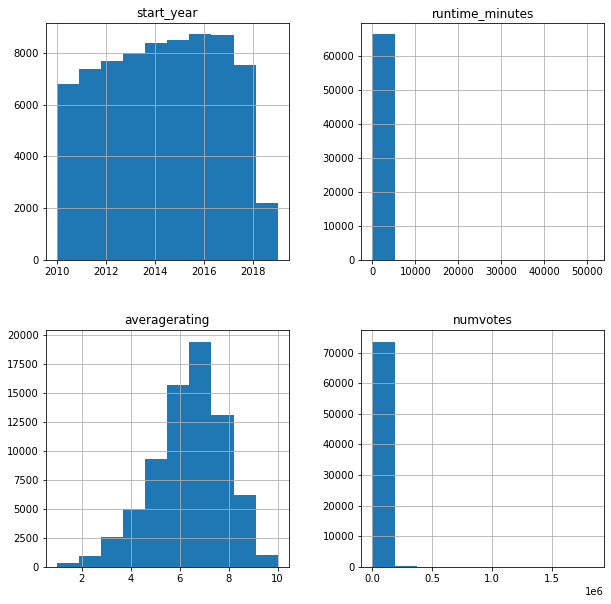

In [20]:
# plot histograms to show data distribution
merged_df.hist(figsize=(10, 10))
plt.show()

In [21]:
# display the missing values as a percentage of respective column data
missing_values = merged_df.isnull().sum().to_frame(name='Number_of_Missing_Values')
missing_values['Percentage'] = (missing_values['Number_of_Missing_Values'] / len(merged_df)) * 100
missing_values

,Number_of_Missing_Values,Percentage
movie_id,0,0.000000
primary_title,0,0.000000
original_title,0,0.000000
start_year,0,0.000000
runtime_minutes,7620,10.317374
genres,804,1.088605
averagerating,0,0.000000
numvotes,0,0.000000


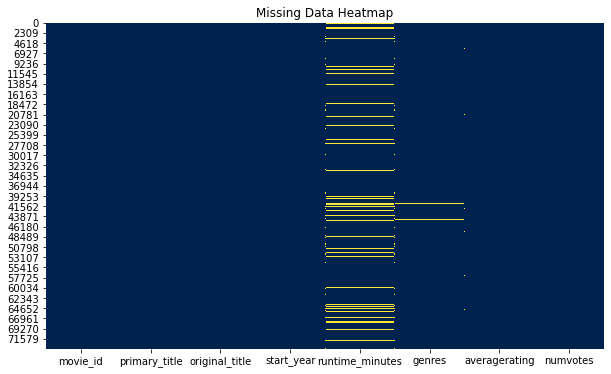

In [22]:
# plot missing values 
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.isnull(), cbar=False, cmap='cividis')
plt.title("Missing Data Heatmap")
plt.show()

## Handle missing values


---

        * The runtime minutes missing values 
          percentage stands 10.32% which is greater than the significant level, in this 
          case  the median will be used to impute the missing values. Also there is a very weak correlation (as will be 
          displayed in subsequesnt analysis)between all features making median the best method
    
        * The missing values on the Genres column is
          1.09% being less than the  significant level. handled by imputing the most 
          frequent genre

In [23]:
# fill the missing genre values by the most frequent genre
most_voted_genre = merged_df['genres'].mode()[0]  
merged_df['genres'].fillna(most_voted_genre, inplace=True)

In [24]:
merged_df['runtime_minutes'].fillna(merged_df['runtime_minutes'].median(), inplace=True)

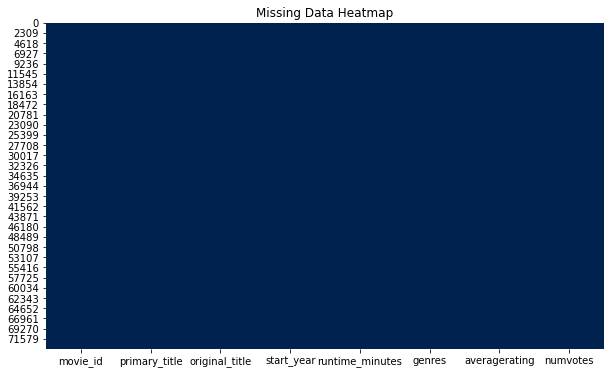

In [25]:
# view missing data after handling missing values
plt.figure(figsize=(10, 6))
sns.heatmap(merged_df.isnull(), cbar=False, cmap='cividis')
plt.title("Missing Data Heatmap")
plt.show()

## Handling outliers


---


Outliers are in the runtime_minutes, averagerating and numvotes columns:

            * The least voted movie has only 5 votes while the  most voted movie which is likely to be a block buster has 
              1,841,066 votes. There is a big difference between mean and median. Mean standing at 3523 and median at 49

            * The movie with least runtime has 3 minutes and the highest runtime is at 51,420 minutes which is most likely due 
              to data error. There is a moderate skew in runtime mean standing  at 94.654 while the median is 91

            * Average rating shows a largely normal distribution where mean is 6.33 and median is 6.5
        

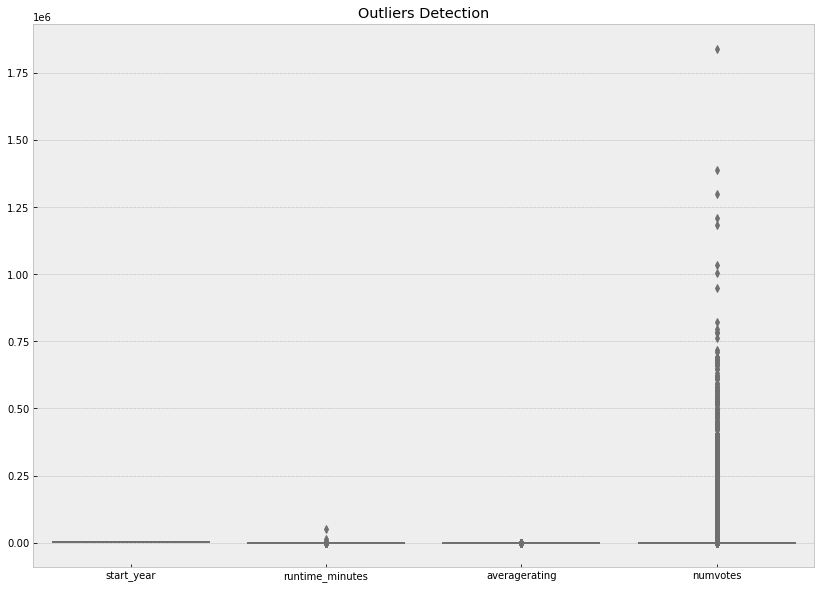

In [26]:
# view outliers 
# Plot the boxplot for outlier detection
plt.style.use('bmh')
plt.figure(figsize=(14, 10))
sns.boxplot(data=merged_df, palette='pastel')
plt.title('Outliers Detection')  
plt.show()

In [27]:
# Calculate InterQuartile Range for runtime_minutes
Q1 = merged_df['runtime_minutes'].quantile(0.25)  
Q3 = merged_df['runtime_minutes'].quantile(0.75) 
IQR = Q3 - Q1  # calculate the Interquartile Range for runtime_minutes

# calculate lower and upper bounds for runtime_minutes outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Remove outliers based on runtime_minutes
cleaned_df = merged_df[(merged_df['runtime_minutes'] >= lower_bound) & 
                        (merged_df['runtime_minutes'] <= upper_bound)]



In [28]:
# calculate the interquartile range for averagerating
Q1 = merged_df['averagerating'].quantile(0.25)  
Q3 = merged_df['averagerating'].quantile(0.75) 
IQR = Q3 - Q1  # claculate the Interquartile Range for averagerating 

# calculate lower and upper bounds for averagerating  outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Remove outliers based on averagerating
cleaned_df = merged_df[(merged_df['averagerating'] >= lower_bound) & 
                        (merged_df['averagerating'] <= upper_bound)]

In [29]:
# calculate InterQuartile range for numvotes
Q1 = merged_df['numvotes'].quantile(0.25)  
Q3 = merged_df['numvotes'].quantile(0.75) 
IQR = Q3 - Q1  # caculate the Interquartile Range fornumvotes

# calculate lower and upper bounds for numvotes outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Remove outliers based on numvotes
cleaned_df = merged_df[(merged_df['numvotes'] >= lower_bound) & 
                        (merged_df['numvotes'] <= upper_bound)]

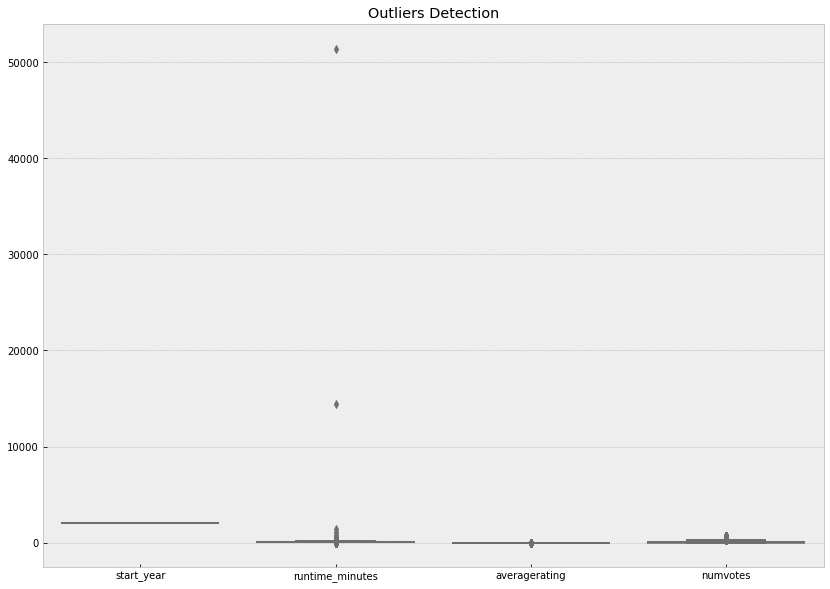

In [30]:
# view outliers 
# Plot the boxplot for outlier detection
plt.style.use('bmh')
plt.figure(figsize=(14, 10))
sns.boxplot(data=cleaned_df, palette='pastel')
plt.title('Outliers Detection')  
plt.show()

## Correlation analysis


---


Based on the correlation matrix:

The correlations between runtime_minutes, averagerating, and numvotes are extremely weak;

            * runtime_minutes and averagerating: -0.01
            * runtime_minutes and numvotes: 0.01
            * numvotes and average rating is -0.22
            
            

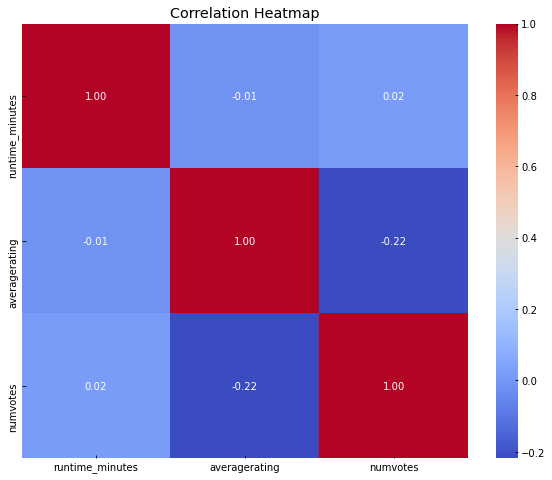

In [31]:
# analyse correlation of the numeric columns 
correlation_data = cleaned_df[["runtime_minutes", "averagerating", "numvotes"]]

# Calculate  correlation matrix
correlation_matrix = correlation_data.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Market share per genre analysis


---


In the film production industry as analysed in the data below, The top 3 genres include;

                1. Drama
                2. Documentary
                3. Comedy
The startup company can consider these niches with already existing audience


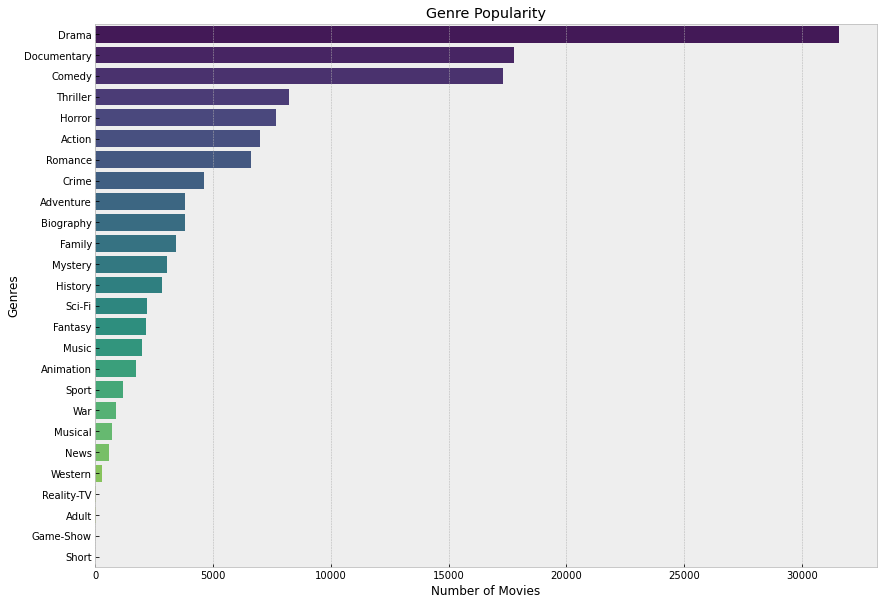

In [32]:
# Split genres into separate unique genre rows to establish the most popular movie genre
merged_df['genres'] = merged_df['genres'].str.split(',')
genres_expanded = merged_df.explode('genres')

# Count occurrences of each genre
genre_counts = genres_expanded['genres'].value_counts()

# Plot genre popularity
plt.figure(figsize=(14, 10))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title('Genre Popularity')
plt.xlabel('Number of Movies')
plt.ylabel('Genres')
plt.show()

In [33]:
# marketshare analysis per genre
# output in percentage marketshare
total_count = genre_counts.sum()  
genre_summary = genre_counts.to_frame(name='Total Movies')  
genre_summary['Market Share (%)'] = (genre_counts / total_count) * 100  
genre_summary

,Total Movies,Market Share (%)
Drama,31592,24.434235
Documentary,17753,13.730722
Comedy,17290,13.372624
Thriller,8217,6.355283
Horror,7674,5.935310
Action,6988,5.404736
Romance,6589,5.096137
Crime,4611,3.566291
Adventure,3817,2.952186
Biography,3809,2.945999


## Popularity Trend


---
As show in the in the analysis below, Drama topped the charts as the highest votes genre for 6 years in a row from 2012 to 2017 and Action followed in 2018 and 2019 


In [46]:
# Filter the data for the years 2012 to 2019
highest_voted_data = merged_df[(merged_df['start_year'] >= 2012) & (merged_df['start_year'] <= 2019)]

# Group by genres and year, summing up the number of votes
genre_votes = highest_voted_data.groupby(['start_year', 'genres'])['numvotes'].sum().reset_index()

# Sort the data by year and number of votes in descending order
genre_votes = genre_votes.sort_values(by=['start_year', 'numvotes'], ascending=[True, False])

# Find the top genre for each year
top_genres_per_year = genre_votes.groupby('start_year').head(1)
top_genres_per_year



,start_year,genres,numvotes
8,2012,Drama,14065540
31,2013,Drama,16926780
55,2014,Drama,16234558
79,2015,Drama,12774809
103,2016,Drama,12497951
126,2017,Drama,10598042
143,2018,Action,7271484
167,2019,Action,1686120


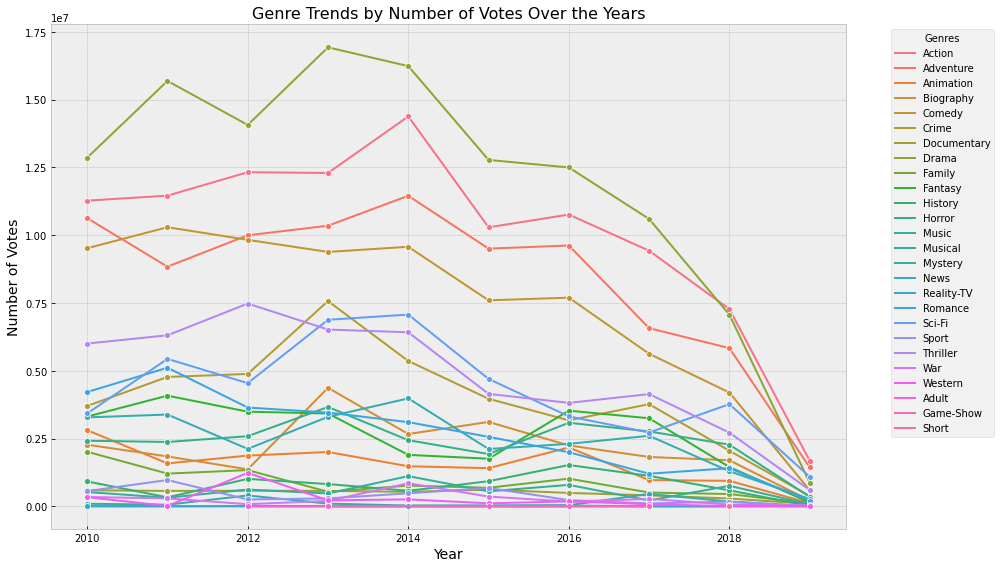

In [35]:

merged_df= merged_df.explode('genres')

# Convert 'start_year' to numeric data
merged_df['start_year'] = pd.to_numeric(merged_df['start_year'], errors='coerce')

# Convert 'numvotes' to numeric data
merged_df['numvotes'] = pd.to_numeric(merged_df['numvotes'], errors='coerce')

# Group by year and genre, summing up the number of votes
genre_trends = merged_df.groupby(['start_year', 'genres']).agg({'numvotes': 'sum'}).reset_index()

# Create the plot
plt.figure(figsize=(14, 8))  # Increase the figure size for better display
sns.lineplot(data=genre_trends, x='start_year', y='numvotes', hue='genres', marker='o')

# Set plot labels and title
plt.title('Genre Trends by Number of Votes Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Votes', fontsize=14)
plt.legend(title='Genres', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position

plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Use copy of merged data to do analysis of weighted rating 
data=merged_df.copy()
# Calculate the mean rating for all movies
C = merged_df['averagerating'].mean()

# Calculate the 90th percentile threshold for number of votes 
m = merged_df['numvotes'].quantile(0.90)

# Filter movies that meet the criteria for successful movies 
successful_movies = data[(merged_df['averagerating'] >= 8.0) & (data['numvotes'] >= 10000)]
successful_movies = successful_movies[successful_movies['numvotes'] >= m]

# Calculate the weighted rating and add as a new column named weighted_rating
successful_movies['weighted_rating'] = (
    (successful_movies['numvotes'] / (successful_movies['numvotes'] + m) * successful_movies['averagerating']) +
    (m / (successful_movies['numvotes'] + m) * C)
)

# convert successful_movies to new dataframe for onward processing
Weighted_movies=successful_movies.copy()
Weighted_movies



In [59]:
# sort the top 10 weighted movies in ascending order
top_10_weighted_movies = Weighted_movies.sort_values(by='weighted_rating', ascending=False).head(10)
genre_summary = top_10_weighted_movies['genres'].value_counts()
genre_summary

Drama          2
Mystery        1
Sci-Fi         1
Crime          1
Thriller       1
Documentary    1
War            1
Action         1
Comedy         1
Name: genres, dtype: int64

In [63]:
# Expand the genres list into individual rows for each genre
# analyse the popular genres by the weighted rating versus the total genre votes
genres_expanded = Weighted_movies.explode('genres')

# Group by genre and calculate the average rating, weighted rating, and average number of votes
genre_analysis = genres_expanded.groupby('genres').agg(
    avg_rating=('averagerating', 'mean'),
    avg_weighted_rating=('weighted_rating', 'mean'),
    total_votes=('numvotes', 'mean')
).reset_index()

# Sort by the average rating, total votes (to prioritize popular genres), and weighted rating
recommended_genres = genre_analysis.sort_values(by=['total_votes'], ascending=False)
recommended_genres_summary = recommended_genres['genres'].value_counts()
recommended_genres_summary



Mystery        1
Drama          1
Crime          1
News           1
War            1
Family         1
Thriller       1
Sci-Fi         1
Music          1
History        1
Comedy         1
Western        1
Action         1
Animation      1
Documentary    1
Romance        1
Sport          1
Biography      1
Fantasy        1
Adventure      1
Horror         1
Name: genres, dtype: int64

## Correlation Coefficient 


---


The low correlations is consistent and in both cases as shown in the 2 plots below, indicate that neither number of votes nor runtime strongly predict rating. This therefore means  that audience preference for movie runtime is subjective and does not impact  movies rating.

High votes may thus reflect visibility and audience size rather than rating. Other factors, budget,  might influence  a movie’s rating 

Correlation between averagerating and numvotes: 0.05942060551504407


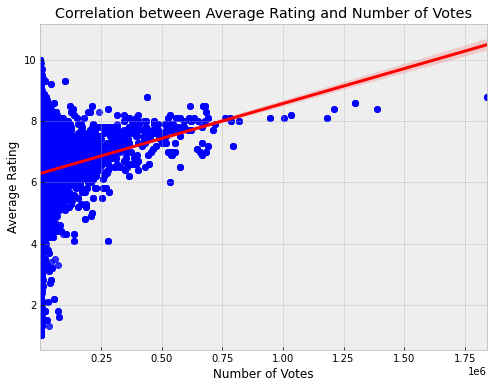

In [39]:
# Calculate the correlation coefficient
correlation = merged_df['averagerating'].corr(merged_df['numvotes'])
print(f"Correlation between averagerating and numvotes: {correlation}")

# Scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='numvotes', y='averagerating', data=merged_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Correlation between Average Rating and Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.show()

Correlation between averagerating and runtime_minutes: -0.005887778542586977


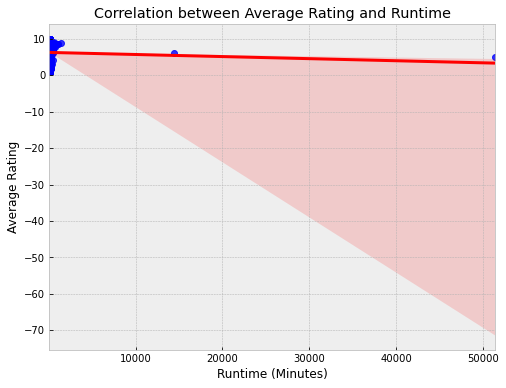

In [40]:
# Calculate the correlation coefficient
correlation = merged_df['averagerating'].corr(merged_df['runtime_minutes'])
print(f"Correlation between averagerating and runtime_minutes: {correlation}")

# Scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='runtime_minutes', y='averagerating', data=merged_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Correlation between Average Rating and Runtime')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Average Rating')
plt.show()

## Recommendation


---


As per the correlation  and the weighted rating analysis, there is no clear winner of the top slot for genre trophy. However the Market share analysis per genre and popularity trend before weighted analysis show that there is a ready audience, through the number of votes, rating for Drama, Action and Documentaries, Mystery, Sci-Fi, Crime, Thriller, War, Action and Comedy in almost equal measure. 


---


This therefore means; 

1. Prioritize the action plan as per the market share per per genre because it guarantees a ready target audience 
2. Scape for more data especially production budgets and revenue per genre to determine which genre to invest in 
3. That the start up management should largely invest in marketing to increase visibility hence take advantage of popularity votes 
4. The management should also engage in portfolio diversification for as a risk management remedy
